## **E-Commerce/Payments Analysis**

###### *Analyze and report metrics/insights on high interchange fees*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### **Import Data**

In [3]:
path = "/content/drive/MyDrive/Data Science/Data Sets/Finance Case Study/Finance Case Study - Data Analysis.csv"
df = pd.read_csv(path)
df.head()

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency
0,01/09/2021,3.326305e+15,414740,CREDIT,US,Ecommerce,5310,True,Yes,9.99,USD,0.339760,USD
1,01/09/2021,3.326305e+15,476895,DEBIT,US,ContAuth,5310,False,Yes,9.99,USD,0.314835,USD
2,01/09/2021,3.326305e+15,414718,CREDIT,US,ContAuth,5311,False,Yes,9.99,USD,0.339760,USD
3,02/09/2021,3.326306e+15,400278,CREDIT,US,ContAuth,5311,False,Yes,9.99,USD,0.339760,USD
4,02/09/2021,3.326306e+15,491523,CREDIT,US,ContAuth,5310,NaN,Yes,9.99,USD,0.339760,USD


In [4]:
# Convert 'txn_reference' into integer to avoid cleaning problems: 3.326305e+15 -> 3326304777555333
df['txn_reference'] = df['txn_reference'].astype(int)
df.head()

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency
0,01/09/2021,3326304777555333,414740,CREDIT,US,Ecommerce,5310,True,Yes,9.99,USD,0.339760,USD
1,01/09/2021,3326305147926393,476895,DEBIT,US,ContAuth,5310,False,Yes,9.99,USD,0.314835,USD
2,01/09/2021,3326305264186706,414718,CREDIT,US,ContAuth,5311,False,Yes,9.99,USD,0.339760,USD
3,02/09/2021,3326305664469827,400278,CREDIT,US,ContAuth,5311,False,Yes,9.99,USD,0.339760,USD
4,02/09/2021,3326305969977557,491523,CREDIT,US,ContAuth,5310,NaN,Yes,9.99,USD,0.339760,USD


### **Data Cleaning**

#### Find Duplicates

In [5]:
print(df.duplicated().sum())

1525


In [6]:
df.loc[df.duplicated() == True, :].head(1)

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency
3611,10/09/2021,6456310000000000,405448,CREDIT,US,ContAuth,5310,False,No,9.99,USD,0.36973,USD


In [7]:
df.loc[(df['txn_reference'] == 6456310000000000) & (df['payment_creation_day'] == '10/09/2021'), :].head(2)

# Keeping duplicate rows, under the assumption each transaction is unique
# There is no Transaction ID to confirm unique transactions vs duplicates. See example below:

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency
688,10/09/2021,6456310000000000,405448,CREDIT,US,ContAuth,5310,False,No,9.99,USD,0.36973,USD
3611,10/09/2021,6456310000000000,405448,CREDIT,US,ContAuth,5310,False,No,9.99,USD,0.36973,USD


#### Check Unique Values

In [8]:
columns = list(df.columns)

for x in columns:
  print(f'{x}: {len(df[x].unique())} types')

# Only 5 unique values in my target column - 'interchange amount'

payment_creation_day: 30 types
txn_reference: 173535 types
bin: 1690 types
funding_source: 3 types
issuer_country_code: 1 types
shopper_interaction: 2 types
mcc: 2 types
cvc_supplied: 3 types
avs_supplied: 2 types
transaction_amount: 1 types
transaction_currency: 1 types
interchange amount: 5 types
interchang_currency: 1 types


#### Find Null values

In [9]:
df.isnull().sum()

# Only null in cvc_supplied, find out if essential

payment_creation_day        0
txn_reference               0
bin                         0
funding_source              0
issuer_country_code         0
shopper_interaction         0
mcc                         0
cvc_supplied            17636
avs_supplied                0
transaction_amount          0
transaction_currency        0
interchange amount          0
interchang_currency         0
dtype: int64

In [10]:
df.loc[df['cvc_supplied'].isnull(), :].head(10)

# All other data is presented, rather not drop
# Assuming its Missing At Random (MAR)

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency
4,02/09/2021,3326305969977557,491523,CREDIT,US,ContAuth,5310,NaN,Yes,9.99,USD,0.33976,USD
28,22/09/2021,3326322728568619,414720,CREDIT,US,Ecommerce,5311,NaN,No,9.99,USD,0.36973,USD
41,14/09/2021,3336315990332936,451723,CREDIT,US,ContAuth,5310,NaN,No,9.99,USD,0.36973,USD
57,29/09/2021,3336329498953358,461264,CREDIT,US,ContAuth,5310,NaN,Yes,9.99,USD,0.33976,USD
65,09/09/2021,3346311789880886,411398,CREDIT,US,ContAuth,5310,NaN,No,9.99,USD,0.36973,USD
83,05/09/2021,3356310000000000,400688,CREDIT,US,ContAuth,5310,NaN,No,9.99,USD,0.36973,USD
102,03/09/2021,3426307048111546,440066,CREDIT,US,Ecommerce,5310,NaN,Yes,9.99,USD,0.33976,USD
106,11/09/2021,3426313670564531,408950,CREDIT,US,ContAuth,5310,NaN,Yes,9.99,USD,0.33976,USD
109,15/09/2021,3426317176786746,440066,CREDIT,US,Ecommerce,5310,NaN,Yes,9.99,USD,0.33976,USD
137,06/09/2021,3446308918148564,410039,CREDIT,US,ContAuth,5310,NaN,No,9.99,USD,0.36973,USD


### **Data Transformation**

In [11]:
df['payment_creation_day'] = pd.to_datetime(df['payment_creation_day']) # make datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192428 entries, 0 to 192427
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   payment_creation_day  192428 non-null  datetime64[ns]
 1   txn_reference         192428 non-null  int64         
 2   bin                   192428 non-null  int64         
 3   funding_source        192428 non-null  object        
 4   issuer_country_code   192428 non-null  object        
 5   shopper_interaction   192428 non-null  object        
 6   mcc                   192428 non-null  int64         
 7   cvc_supplied          174792 non-null  object        
 8   avs_supplied          192428 non-null  object        
 9   transaction_amount    192428 non-null  float64       
 10  transaction_currency  192428 non-null  object        
 11  interchange amount    192428 non-null  float64       
 12  interchang_currency   192428 non-null  object        
dtyp

#### Create new columns

In [12]:
df['Year/Month'] = df['payment_creation_day'].dt.strftime('%Y-%m')
df['Month'] = df['payment_creation_day'].dt.month
df['ICA'] = df['interchange amount']

#### One-Hot Encoding (*Interchange Amount Count*)

In [13]:
# Used one-hot encoding to classify each interchange amount since only 5 types

def onehot(dataframe, feature):
    dataframe = pd.get_dummies(dataframe, columns = [feature])
    return dataframe;

df = onehot(df, 'ICA')

In [14]:
df.tail()

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency,Year/Month,Month,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
192423,2021-09-20,6856321547682552,438857,CREDIT,US,ContAuth,5310,False,Yes,9.99,USD,0.33976,USD,2021-09,9,0,1,0,0,0
192424,2021-09-28,6856328539972966,481869,CREDIT,US,ContAuth,5311,False,Yes,9.99,USD,0.33976,USD,2021-09,9,0,1,0,0,0
192425,2021-09-28,6856328655121927,440066,CREDIT,US,ContAuth,5311,False,No,9.99,USD,0.36973,USD,2021-09,9,0,0,1,0,0
192426,2021-09-29,6856329004450587,400278,CREDIT,US,ContAuth,5310,False,Yes,9.99,USD,0.33976,USD,2021-09,9,0,1,0,0,0
192427,2021-09-29,6856329486610815,400344,CREDIT,US,Ecommerce,5311,True,Yes,9.99,USD,0.33976,USD,2021-09,9,0,1,0,0,0


### **Exploratory Data Analysis** (EDA)

In [15]:
ICA_col = ['ICA_0.314835', 'ICA_0.33976', 'ICA_0.36973', 'ICA_0.374825', 'ICA_0.43981000000000003']

#### Percent of Interchange Fees

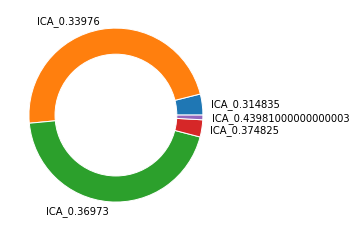

,ICA,Count,Pct of Total %
0,ICA_0.314835,7498,3.90
1,ICA_0.33976,91601,47.60
2,ICA_0.36973,85529,44.45
3,ICA_0.374825,6131,3.19
4,ICA_0.43981000000000003,1669,0.87


In [16]:
ica_percent = pd.DataFrame()
ica_percent['ICA'] = ICA_col
tcount_ica = df['interchange amount'].count()
ica_ = []
ica_count = []
for x in ICA_col:
  ica_count.append(df[x].sum())
  ica_.append(round(df[x].sum()/tcount_ica*100, 2))

plt.pie(ica_count, labels=ICA_col, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

ica_percent['Count'] = ica_count
ica_percent['Pct of Total %'] = ica_
ica_percent

#### Payment Date - *ICA by Month*

,Year/Month,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,2021-01,3196.0,3762.0,2020.0,3071.0,7.0
1,2021-02,1005.0,3346.0,1915.0,1039.0,45.0
2,2021-03,135.0,3125.0,1979.0,110.0,71.0
3,2021-04,98.0,2899.0,1954.0,135.0,53.0
4,2021-05,104.0,3024.0,2357.0,110.0,55.0
5,2021-06,92.0,3611.0,2504.0,132.0,44.0
6,2021-07,207.0,3277.0,2677.0,79.0,59.0
7,2021-08,79.0,3166.0,2689.0,87.0,46.0
8,2021-09,2274.0,56992.0,59025.0,1146.0,1127.0
9,2021-10,188.0,2871.0,2831.0,75.0,58.0


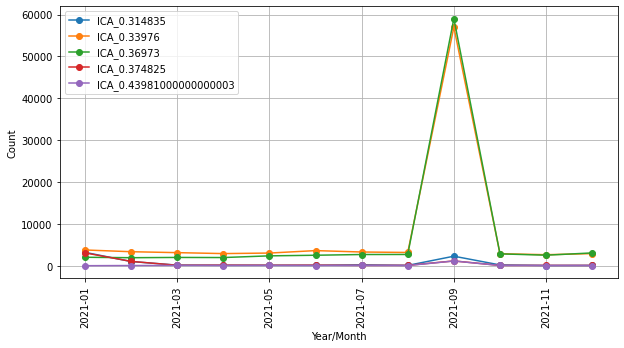

In [17]:
PD = pd.DataFrame()
MY_dict = {'MY_{}'.format(x):[] for x in ICA_col}
for x in ICA_col:
  PD[x] = MY_dict[x] = df.groupby('Year/Month').sum()[x]

PD = PD.reset_index()
PD.plot(x='Year/Month', figsize=(10, 5), marker='o', grid=True)
plt.ylabel('Count')
plt.xticks(rotation=90)

PD
# Large increase of .33976 and .36973 IC fees in '2019-09'
# Nothing with top 2 rates

#### Funding Source - *Debit vs Credit vs Prepaid*

##### Average ICA

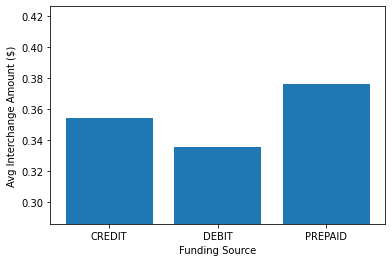

,funding_source,count,ICA Avg
0,CREDIT,177130,0.354231
1,DEBIT,9000,0.335692
2,PREPAID,6298,0.376548


In [18]:
fs = df.groupby('funding_source').count()['interchang_currency'].reset_index().rename(columns={'interchang_currency':'count'})
f_icc = fs['ICA Avg'] = df.groupby('funding_source').mean()['interchange amount'].values
fund = [fund for fund, df in df.groupby('funding_source')]

plt.bar(fund, f_icc)
plt.xticks(fund)
plt.ylim(min(f_icc)-0.05, max(f_icc)+0.05)
plt.xlabel('Funding Source')
plt.ylabel('Avg Interchange Amount ($)')
plt.show()

fs

##### Count by ICA Type

,funding_source,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,CREDIT,0,91601,85529,0,0
1,DEBIT,7498,0,0,0,1502
2,PREPAID,0,0,0,6131,167


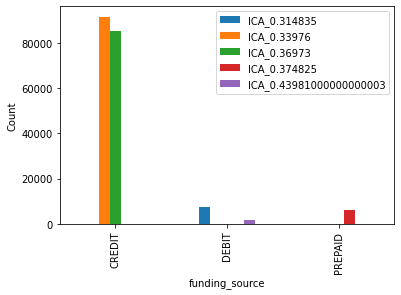

In [19]:
fund = [fund for fund, df in df.groupby('funding_source')]
fica = pd.DataFrame(fund, columns=['funding_source'])
for x in ICA_col:
  fica[x] = df.groupby('funding_source').sum()[x].astype(int).values

fica.plot(x='funding_source', kind='bar',stacked=False)
plt.ylabel('Count')

fica
# All credit charged .33976 or .36973
# All debit charged .314835 or .43981
# All prepaid charged .374825 or .43981
# Assumed direct factor

#### Shopper Interaction - *ContAuth vs E-Commerce* 

##### Average ICA

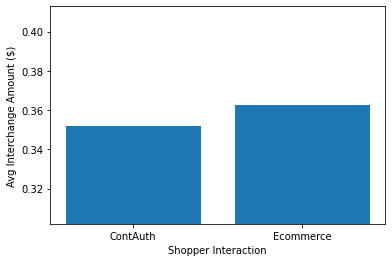

,shopper_interaction,count,ICC Avg
0,ContAuth,156689,0.352105
1,Ecommerce,35739,0.362817


In [20]:
si = df.groupby('shopper_interaction').count()['interchang_currency'].reset_index().rename(columns={'interchang_currency':'count'})
si_icc = si['ICC Avg'] = df.groupby('shopper_interaction').mean()['interchange amount'].values
shop = [fund for fund, df in df.groupby('shopper_interaction')]

plt.bar(shop, si_icc)
plt.xticks(shop)
plt.ylim(min(si_icc)-0.05, max(si_icc)+0.05)
plt.xlabel('Shopper Interaction')
plt.ylabel('Avg Interchange Amount ($)')
plt.show()

si

##### Count by ICA Type

,shopper_interaction,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,ContAuth,6379,84848,59558,4344,1560
1,Ecommerce,1119,6753,25971,1787,109


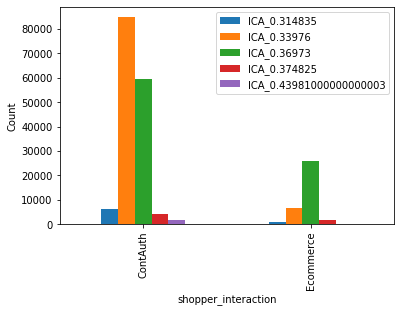

In [21]:
shop = [fund for fund, df in df.groupby('shopper_interaction')]
sica = pd.DataFrame(shop, columns=['shopper_interaction'])
for x in ICA_col:
  sica[x] = df.groupby('shopper_interaction').sum()[x].astype(int).values

sica.plot(x='shopper_interaction', kind='bar',stacked=False)
plt.ylabel('Count')
sica

#### Merchant Category Code (MCC) - *5310 vs 5311*

##### Average ICA

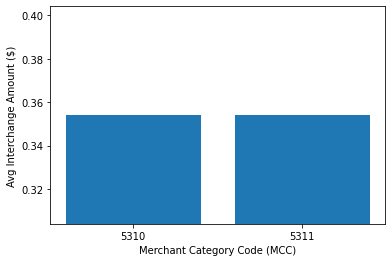

,mcc,count,ICC Avg
0,5310,120519,0.354177
1,5311,71909,0.353957


In [22]:
mcc = df.groupby('mcc').count()['interchang_currency'].reset_index().rename(columns={'interchang_currency':'count'})
mcc_icc = mcc['ICC Avg'] = df.groupby('mcc').mean()['interchange amount'].values
mc = [fund for fund, df in df.groupby('mcc')]

plt.bar(mc, mcc_icc)
plt.xticks(mc)
plt.ylim(min(mcc_icc)-0.05, max(mcc_icc)+0.05)
plt.xlabel('Merchant Category Code (MCC)')
plt.ylabel('Avg Interchange Amount ($)')
plt.show()

mcc

##### Count by ICA Type

,mcc,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,5310,3453,58787,55078,2268,933
1,5311,4045,32814,30451,3863,736


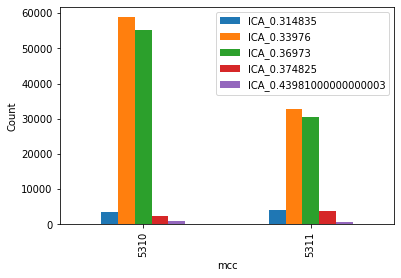

In [23]:
mc = [fund for fund, df in df.groupby('mcc')]
mccica = pd.DataFrame(mc, columns=['mcc'])
for x in ICA_col:
  mccica[x] = df.groupby('mcc').sum()[x].astype(int).values

mccica.plot(x='mcc', kind='bar',stacked=False)
plt.ylabel('Count')
mccica

#### Card Verification Number (CVC) - *True vs False vs NaN*

##### Average ICA

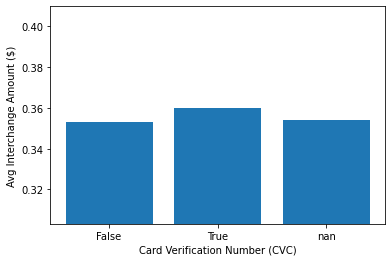

,cvc_supplied,count,ICC Avg
0,False,149344,0.353130
1,True,25448,0.359869
2,NaN,17636,0.353928


In [24]:
cvc = df.groupby('cvc_supplied', dropna=False).count()['interchang_currency'].reset_index().rename(columns={'interchang_currency':'count'})
cvc_icc = cvc['ICC Avg'] = df.groupby('cvc_supplied', dropna=False).mean()['interchange amount'].values
cv = [str(fund) for fund, df in df.groupby('cvc_supplied', dropna=False)]

plt.bar(cv, cvc_icc)
plt.xticks(cv)
plt.ylim(min(cvc_icc)-0.05, max(cvc_icc)+0.05)
plt.xlabel('Card Verification Number (CVC)')
plt.ylabel('Avg Interchange Amount ($)')
plt.show()

cvc

##### Count by ICA Type

,cvc_supplied,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,False,6353,75137,62094,4341,1419
1,True,1145,6861,15532,1790,120
2,nan,0,9603,7903,0,130


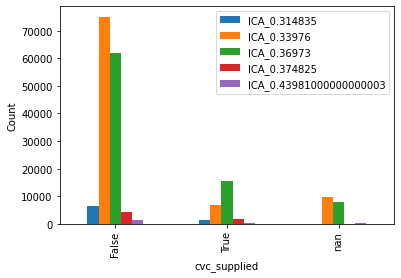

In [25]:
cv = [str(fund) for fund, df in df.groupby('cvc_supplied', dropna=False)]
cvica = pd.DataFrame(cv, columns=['cvc_supplied'])
for x in ICA_col:
  cvica[x] = df.groupby('cvc_supplied', dropna=False).sum()[x].astype(int).values

cvica.plot(x='cvc_supplied', kind='bar',stacked=False)
plt.ylabel('Count')
cvica

#### Address Data Supplied (AVS) - *Yes vs No*

##### Average ICA

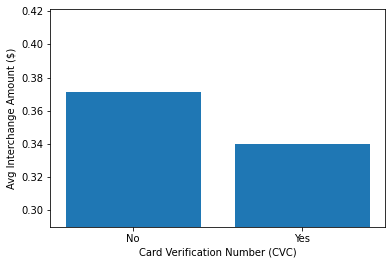

,avs_supplied,count,ICC Avg
0,No,87198,0.371071
1,Yes,105230,0.340027


In [26]:
avs = df.groupby('avs_supplied', dropna=False).count()['interchang_currency'].reset_index().rename(columns={'interchang_currency':'count'})
avs_icc = avs['ICC Avg'] = df.groupby('avs_supplied', dropna=False).mean()['interchange amount'].values
av = [fund for fund, df in df.groupby('avs_supplied', dropna=False)]

plt.bar(av, avs_icc)
plt.xticks(av)
plt.ylim(min(avs_icc)-0.05, max(avs_icc)+0.05)
plt.xlabel('Card Verification Number (CVC)')
plt.ylabel('Avg Interchange Amount ($)')
plt.show()

avs

##### Count by ICA Type

,avs_supplied,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
0,No,0,0,85529,0,1669
1,Yes,7498,91601,0,6131,0


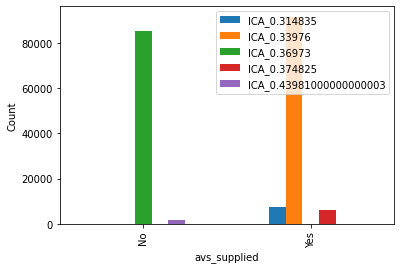

In [27]:
av = [fund for fund, df in df.groupby('avs_supplied')]
avica = pd.DataFrame(av, columns=['avs_supplied'])
for x in ICA_col:
  avica[x] = df.groupby('avs_supplied').sum()[x].astype(int).values

avica.plot(x='avs_supplied', kind='bar',stacked=False)
plt.ylabel('Count')
avica

### Correlation Analysis



In [28]:
corr_df = df[['funding_source', 'avs_supplied']+ICA_col]
corr_final = corr_df.groupby(['funding_source', 'avs_supplied']).sum()

In [29]:
corr_df = onehot(corr_df, 'funding_source')
corr_df = onehot(corr_df, 'avs_supplied')

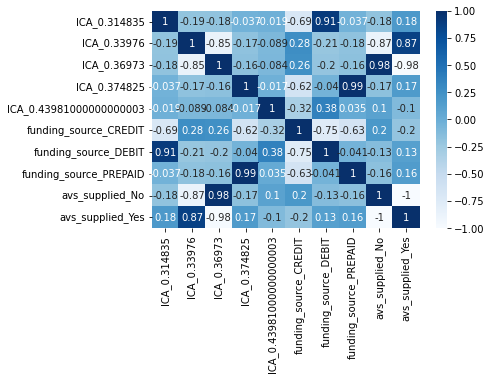

In [30]:
corr = corr_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Dark blue categorical features show high correlation with each ICA

ICA_0.314835  ...  ICA_0.43981000000000003
funding_source avs_supplied                ...                         
CREDIT         No                     0.0  ...                      0.0
               Yes                    0.0  ...                      0.0
DEBIT          No                     0.0  ...                   1502.0
               Yes                 7498.0  ...                      0.0
PREPAID        No                     0.0  ...                    167.0
               Yes                    0.0  ...                      0.0

[6 rows x 5 columns]

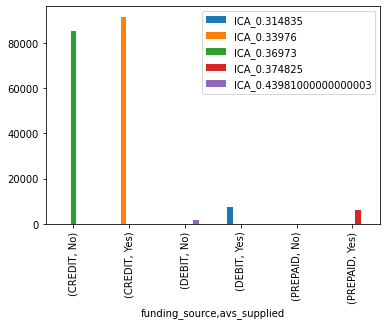

In [31]:
corr_final.plot(kind='bar')
corr_final

# All transactions are grouped by 'funding_source'/'avs_supplied' showing direct impact on ICA selection

### High Fee Reasoning - *0.374825 and 0.43981* 

#### Interchange Fee - 0.374825

In [32]:
df.loc[df['ICA_0.374825'] == 1, :].head()

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency,Year/Month,Month,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
35,2021-02-09,3336305386442738,440393,PREPAID,US,ContAuth,5311,False,Yes,9.99,USD,0.374825,USD,2021-02,2,0,0,0,1,0
59,2021-09-30,3336330159531657,447930,PREPAID,US,ContAuth,5310,False,Yes,9.99,USD,0.374825,USD,2021-09,9,0,0,0,1,0
99,2021-01-09,3426305296679016,440393,PREPAID,US,ContAuth,5311,False,Yes,9.99,USD,0.374825,USD,2021-01,1,0,0,0,1,0
115,2021-09-21,3426322560527441,440393,PREPAID,US,ContAuth,5311,False,Yes,9.99,USD,0.374825,USD,2021-09,9,0,0,0,1,0
153,2021-09-22,3446322815020917,451395,PREPAID,US,ContAuth,5310,False,Yes,9.99,USD,0.374825,USD,2021-09,9,0,0,0,1,0


In [33]:
df.loc[df['ICA_0.374825'] == 1, :][['funding_source', 'avs_supplied']].value_counts()

# 2nd highest fee (0.374825) only produced when PREPAID w/ address supplied

funding_source  avs_supplied
PREPAID         Yes             6131
dtype: int64

#### Interchange Fee - 0.43981

In [34]:
df.loc[df['ICA_0.43981000000000003'] == 1, :].head()

,payment_creation_day,txn_reference,bin,funding_source,issuer_country_code,shopper_interaction,mcc,cvc_supplied,avs_supplied,transaction_amount,transaction_currency,interchange amount,interchang_currency,Year/Month,Month,ICA_0.314835,ICA_0.33976,ICA_0.36973,ICA_0.374825,ICA_0.43981000000000003
53,2021-09-27,3336327163255521,412842,DEBIT,US,ContAuth,5310,False,No,9.99,USD,0.43981,USD,2021-09,9,0,0,0,0,1
78,2021-09-29,3346330000000000,431559,DEBIT,US,ContAuth,5311,False,No,9.99,USD,0.43981,USD,2021-09,9,0,0,0,0,1
243,2021-09-23,3546324134762707,481669,DEBIT,US,ContAuth,5310,False,No,9.99,USD,0.43981,USD,2021-09,9,0,0,0,0,1
379,2021-09-27,6326327480755265,436618,DEBIT,US,ContAuth,5310,False,No,9.99,USD,0.43981,USD,2021-09,9,0,0,0,0,1
635,2021-09-18,6446319236705244,451056,DEBIT,US,ContAuth,5310,False,No,9.99,USD,0.43981,USD,2021-09,9,0,0,0,0,1


In [35]:
df.loc[df['ICA_0.43981000000000003'] == 1, :][['funding_source', 'avs_supplied']].value_counts()

# Highest fee (0.43981) only produced when DEBIT or PREPAID w/ no address supplied

funding_source  avs_supplied
DEBIT           No              1502
PREPAID         No               167
dtype: int64

#### Interchange Fee - Prepaid

In [36]:
df.loc[df['funding_source'] == 'PREPAID', :][ICA_col].value_counts()

# Prepaid transactions only produce higher fees

ICA_0.314835  ICA_0.33976  ICA_0.36973  ICA_0.374825  ICA_0.43981000000000003
0             0            0            1             0                          6131
                                        0             1                           167
dtype: int64